# Computer Vision in pytorch

In this notebook we'll cover lessons 1-4 from the first fast.ai deep learning course.  We'll be doing a lot of work implementing everything that Jeremy does from scratch using pytorch and everything else. 

Also, turns out the [pytorch tutorials](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html) are dope. I honestly learned a bit more about torch from those since Jeremy likes to hide a lot of the details behind his api. 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt

import numpy as np
import torch

from utils.datasets import *

In [3]:
# Path to data
PATH = "C:/Users/Alexander/GitHub/LearningNotebook/fast.ai/data/dogscats/dogscats/"
# Size of our image for training (smaller than original)
sz=224

In [4]:
# Verify that our GPU is ready to work
torch.cuda.is_available(), torch.backends.cudnn.enabled

(True, True)

## Reviewing the images

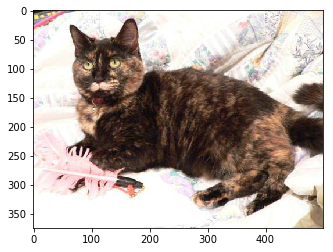

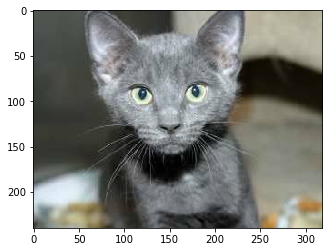

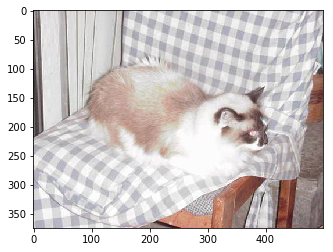

In [44]:
sample_img(f'{PATH}train/cats', num_samples=3)

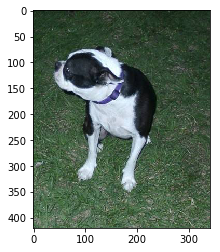

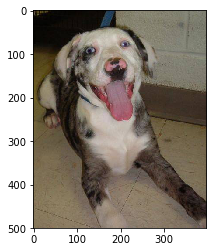

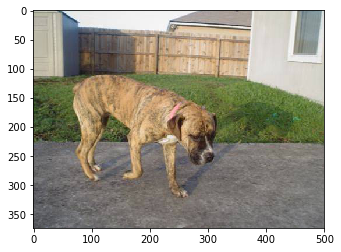

In [45]:
sample_img(f'{PATH}train/dogs', num_samples=3)

## Loading the Data into pytorch

The vision problem is a heavily studied one, and hence has many prebuilt tools waiting to be exploited.  Torchvision is one such trove.  Our image dataset class will be quite small because of the ImageDataset class built in torvision

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

For any dataset, we'll need a few things pretty consistantly need a few elements:
  * The Dataset Class
  * The Dataloader
  * Data Transformations

In [97]:
# Predefine our
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ]),
}
image_datasets = {x: datasets.ImageFolder(f'{PATH}{x}', data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=128, shuffle=True, num_workers=4)
               for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

# If it's available, we'll use it
use_gpu = torch.cuda.is_available()

In [98]:
sample = next(iter(dataloaders['train']))

In [99]:
#means = [np.mean(np.array(s), axis=(0, 2, 3)) for s in sample]
means = [np.array(s) for s in sample]

In [103]:
means

[array([[[[ 0.93725491,  0.94117647,  0.94509804, ...,  0.93725491,
            0.90196079,  0.97647059],
          [ 0.92941177,  0.93333334,  0.93725491, ...,  0.93725491,
            0.90196079,  0.97647059],
          [ 0.93725491,  0.94117647,  0.94117647, ...,  0.93725491,
            0.90196079,  0.97647059],
          ..., 
          [ 0.82352942,  0.82745099,  0.83137256, ...,  0.76862746,
            0.79607844,  0.81176472],
          [ 0.82352942,  0.81960785,  0.8392157 , ...,  0.79215688,
            0.80000001,  0.80392158],
          [ 0.82352942,  0.82352942,  0.85490197, ...,  0.81960785,
            0.79607844,  0.78823531]],
 
         [[ 0.9137255 ,  0.9137255 ,  0.91764706, ...,  0.9254902 ,
            0.89411765,  0.97647059],
          [ 0.9137255 ,  0.91764706,  0.92156863, ...,  0.9254902 ,
            0.89411765,  0.97647059],
          [ 0.92156863,  0.9254902 ,  0.9254902 , ...,  0.9254902 ,
            0.89411765,  0.97647059],
          ..., 
          [